1980


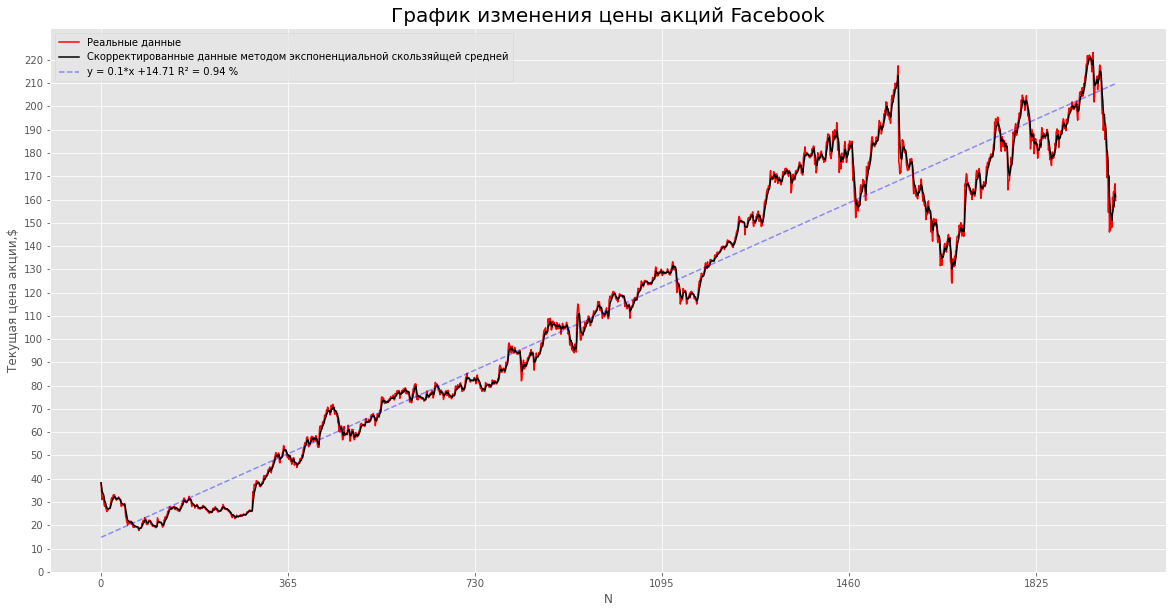

In [64]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import math 
import csv

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
#from sklearn.metrics import mean_squared_error, r2_Score


df = pd.read_csv("Facebook.csv", sep = ";")

maxN=maxN=df.N.max()
maxN=int(maxN)

B=df.Price[0:maxN]


#EMA- экспоненциальная взвешенная скользящая средняя.
EMA=[]
a=B[0]
for i in range(1,maxN,1):
    
    EMA.append(a)
    a=(1/3)*B[i]+(2/3)*a
    
EMA.append(a)
    
    
A=df.N[0:maxN]



Q=df.N[0:maxN]

fig  ,ax = plt.subplots(figsize=(20, 10))
ax.plot(Q,B, linestyle='-', color='Red', marker='', label='Реальные данные', )

ax.plot(A,EMA, linestyle='-', color='black', marker='', label='Cкорректированные данные методом экспоненциальной скользяйщей средней', )

x=Q
Y=y = coef_b*x + coef_a

ax.plot(x,Y, linestyle='--', color='blue', alpha=0.4, label='y = 0.1*x +14.71 R² = 0.94 %')

ax.set_title('График изменения цены акций Facebook',fontsize=20)


ax.set_xlabel("N")
ax.set_ylabel("Текущая цена акции,$")
ax.legend(loc='best')

ax.set_xticks(np.arange(0,maxN,365))
ax.set_yticks(np.arange(0,230,10))



fig.savefig('./graf1.png')

print(maxN)

In [32]:
#МНК для исходных данных
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("Facebook.csv", sep = ";")
B=df.N[0:maxN]
A=df.Price[0:maxN]

for i in range(0,maxN,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,maxN,1):
    y=np.append(y,A[i])

model = LinearRegression()
model.fit(x, y)

round(2.65, 1)

coef_deter = model.score(x, y)
print(color.BOLD +'Коэффициент детерминации линйеной регресии ='+ color.END, round(coef_deter,2),'%')

coef_a=model.intercept_
coef_b=model.coef_[0]
print( color.BOLD + 'Оценка параметра a линйеной регресии ='+ color.END, round(coef_a,2))
print( color.BOLD +'Оценка параметра b линйеной регресии ='+ color.END,round(coef_b,2))



Коэффициент детерминации линйеной регресии = 0.94 %
Оценка параметра a линйеной регресии = 14.71
Оценка параметра b линйеной регресии = 0.1


In [33]:
#Cтроим аддитивную модель


SMark=[]
for i in range (0,maxN,1):
    SMark.append(A[i]-EMA[i])

        


sum1=SMark[0]
sum2=SMark[1]
sum3=SMark[2]
sum4=SMark[3]
sum5=SMark[4]
for i in range(5,maxN,1):
    if((i-5)%5==0):
        sum1+=SMark[i]
    if((i-5)%5==1):
        sum2+=SMark[i]
    if((i-5)%5==2):
        sum3+=SMark[i]
    if((i-5)%5==3):
        sum4+=SMark[i]
    if((i-5)%5==4):
        sum5+=SMark[i]

avgsum1=sum1/(maxN/5)
avgsum2=sum2/(maxN/5)
avgsum3=sum3/(maxN/5)
avgsum4=sum4/(maxN/5)
avgsum5=sum5/(maxN/5)

coravgsum1=avgsum1-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum2=avgsum2-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum3=avgsum3-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum4=avgsum4-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum5=avgsum5-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
print(color.BOLD +'Bыполним проверку: сумма скорректированных сезонных компонент должна быть равна нулю:'+ color.END)

zero=coravgsum1+coravgsum2+coravgsum3+coravgsum4+coravgsum5
print(color.BOLD +'Сумма скорректированных сезонных компонент='+ color.END,round(zero,1))

#SMark- оценка сезонной компоненты
#sum(i)-сумма оценок сезонных компонент для каждого дня недели
#avgsum(i)-средняя от sum(i)
#coravgsum(i)-скорректированная среднняя sum(i)

#YS=Т+Е в аддитивной модели
YS=[]

for i in range(0,maxN,1):
    if((i-5)%5==0):
        YS.append(A[i]-coravgsum1)
    if((i-5)%5==1):
        YS.append(A[i]-coravgsum2)
    if((i-5)%5==2):
        YS.append(A[i]-coravgsum3)
    if((i-5)%5==3):
        YS.append(A[i]-coravgsum4)
    if((i-5)%5==4):
        YS.append(A[i]-coravgsum5)
#print(YS)
        

    


#Считаем значения Т-трендовой составляющей

T=[]
for i in range(1,maxN+1,1):
    T.append(coef_a+coef_b*i)
#print(T)






#Находим прогнозные значения по аддитивной модели ряда
TS=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        TS.append(T[i]+coravgsum1)
    if((i-5)%5==1):
        TS.append(T[i]+coravgsum2)
    if((i-5)%5==2):
        TS.append(T[i]+coravgsum3)
    if((i-5)%5==3):
        TS.append(T[i]+coravgsum4)
    if((i-5)%5==4):
        TS.append(T[i]+coravgsum5)
        
        
#Находим случайную составляющую E
E=[]

for i in range(0,maxN,1):
    E.append(A[i]-TS[i])
#print(E) 


#найдем сумму квадратов отклонениц для линейной аддитивной модели
RSS_Add=0
for i in range (0,maxN,1):
    RSS_Add+=(E[i]*E[i])
#print(RSS_Add)



print( color.BOLD +'Сумма квадратов отклонений линейной аддитивной  модели ='+ color.END,round(RSS_Add,2))




Bыполним проверку: сумма скорректированных сезонных компонент должна быть равна нулю:
Сумма скорректированных сезонных компонент= 0.0
Сумма квадратов отклонений линейной аддитивной  модели = 406702.56


In [34]:
#Строим мультипликативную модель 


#SMark_Multi- оценка сезонной компоненты мультипликативной модели
SMark_Multi=[]
for i in range (0,maxN,1):
    SMark_Multi.append(A[i]/EMA[i])

        

#Multi_sum(i)-сумма оценок сезонных компонент для каждого дня недели
Multi_sum1=SMark_Multi[0]
Multi_sum2=SMark_Multi[1]
Multi_sum3=SMark_Multi[2]
Multi_sum4=SMark_Multi[3]
Multi_sum5=SMark_Multi[4]
for i in range(5,maxN,1):
    if((i-5)%5==0):
        Multi_sum1+=SMark_Multi[i]
    if((i-5)%5==1):
        Multi_sum2+=SMark_Multi[i]
    if((i-5)%5==2):
        Multi_sum3+=SMark_Multi[i]
    if((i-5)%5==3):
        Multi_sum4+=SMark_Multi[i]
    if((i-5)%5==4):
        Multi_sum5+=SMark_Multi[i]

#AMSum(i)-средняя от Multi_sum(i)

AMSum1=Multi_sum1/(maxN/5)
AMSum2=Multi_sum2/(maxN/5)
AMSum3=Multi_sum3/(maxN/5)
AMSum4=Multi_sum4/(maxN/5)
AMSum5=Multi_sum5/(maxN/5)

#Найдем корректирующий коэффициент 
kor_coef=5/(AMSum1+AMSum2+AMSum3+AMSum4+AMSum5)

print(color.BOLD +'Корректирующий коэффициент равен='+ color.END, round(kor_coef,4))

#CAMSum(i)-скорректированная среднняя sum(i)
CAMSum1=AMSum1*kor_coef
CAMSum2=AMSum2*kor_coef
CAMSum3=AMSum3*kor_coef
CAMSum4=AMSum4*kor_coef
CAMSum5=AMSum5*kor_coef

#сделаем проверку суммы CAMSum(i)
five=CAMSum1+CAMSum2+CAMSum3+CAMSum4+CAMSum5
#print(five)

print(color.BOLD + "Сумма сезонных компонент по мультипликативной модели равна"+ color.END, round(five,2))

#YS_Multi=Yt/Si в мультипликативной модели модели

YS_Multi=[]

for i in range(0,maxN,1):
    if((i-5)%5==0):
        YS_Multi.append(A[i]/CAMSum1)
    if((i-5)%5==1):
        YS_Multi.append(A[i]/CAMSum2)
    if((i-5)%5==2):
        YS_Multi.append(A[i]/CAMSum3)
    if((i-5)%5==3):
        YS_Multi.append(A[i]/CAMSum4)
    if((i-5)%5==4):
        YS_Multi.append(A[i]/CAMSum5)
        




#Находим прогнозные значения по   мультипликативной модели ряда
TS_Multi=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        TS_Multi.append(T[i]*CAMSum1)
    if((i-5)%5==1):
        TS_Multi.append(T[i]*CAMSum2)
    if((i-5)%5==2):
        TS_Multi.append(T[i]*CAMSum3)
    if((i-5)%5==3):
        TS_Multi.append(T[i]*CAMSum4)
    if((i-5)%5==4):
        TS_Multi.append(T[i]*CAMSum5)
#print(TS_Multi)

#Находим случайную составляющую E

E_Multi=[]

for i in range(0,maxN,1):
    E_Multi.append(A[i]/TS_Multi[i])
#print(E_Multi)     


#найдем сумму квадратов отклонениц для линейной Мультипликативной модели
RSS_Multi=0
for i in range (0,maxN,1):
    RSS_Multi+=(E_Multi[i]*E_Multi[i])


print( color.BOLD +'Сумма квадратов отклонений линейной мультипликативной  модели ='+ color.END,round(RSS_Multi,2))







Корректирующий коэффициент равен= 0.9987
Сумма сезонных компонент по мультипликативной модели равна 5.0
Сумма квадратов отклонений линейной мультипликативной  модели = 2036.32


In [35]:
#Построим экспоненциальную модель врменного ряда
LNY=[]
for i in range(0,maxN,1):
    LNY.append(math.log(A[i]))
#найдем оценки параметров  уравнения регрессии МНК

x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("Facebook.csv", sep = ";")
B=df.N[0:maxN]


for i in range(0,maxN,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,maxN,1):
    y=np.append(y,LNY[i])

model = LinearRegression()
model.fit(x, y)



exp_coef_deter = model.score(x, y)
print(color.BOLD +'Коэффициент детерминации экспоненциальной модели регресии ='+ color.END, round(exp_coef_deter,2),'%')

exp_coef_a=model.intercept_
exp_coef_b=model.coef_[0]
print( color.BOLD + 'Оценка параметра a экспоненциальной модели регресии ='+ color.END, round(exp_coef_a,2))
print( color.BOLD +'Оценка параметра b экспоненциальной модели регресии ='+ color.END,round(exp_coef_b,4))







#Рассчитаем трендовую составляющию для экспоненциальной модели.

exp_T=[]

for i in range(0,maxN,1):
    
    exp_T.append(math.exp(exp_coef_a+exp_coef_b*(i+1)))

    
    
    
    


#Находим прогнозные значения по exp  мультипликативной модели ряда
exp_TS_Multi=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        exp_TS_Multi.append(exp_T[i]*CAMSum1)
    if((i-5)%5==1):
        exp_TS_Multi.append(exp_T[i]*CAMSum2)
    if((i-5)%5==2):
        exp_TS_Multi.append(exp_T[i]*CAMSum3)
    if((i-5)%5==3):
        exp_TS_Multi.append(exp_T[i]*CAMSum4)
    if((i-5)%5==4):
        exp_TS_Multi.append(exp_T[i]*CAMSum5)



#Находим случайную составляющую E для exp модели

exp_E_Multi=[]

for i in range(0,maxN,1):
    exp_E_Multi.append(A[i]/exp_TS_Multi[i])
#print(exp_E_Multi)   

#найдем сумму квадратов отклонениц для экспоненциальной мультипликативной модели
RSS_exp=0
float(RSS_exp)

for i in range (0,maxN,1):
    RSS_exp+=(exp_E_Multi[i]*exp_E_Multi[i])
print( color.BOLD +'Сумма квадратов отклонений экспоненциальной модели ='+ color.END,round(RSS_exp,2))




#найдем сумму(E(i)-E(i-1))^2
sumd=0
for i in range(1,maxN,1):
    sumd+=((exp_E_Multi[i]-exp_E_Multi[i-1])**2)
    #print(sumd)

d_exp=((sumd/RSS_exp))
print( color.BOLD +'Критерий Дарбина-Уотсона='+ color.END,round(d_exp,6))


    
    
    

Коэффициент детерминации экспоненциальной модели регресии = 0.87 %
Оценка параметра a экспоненциальной модели регресии = 3.43
Оценка параметра b экспоненциальной модели регресии = 0.0011
Сумма квадратов отклонений экспоненциальной модели = 2190.1
Критерий Дарбина-Уотсона= 0.000433


In [36]:
#Построим степенную модель врменного ряда

LNX=[]
for i in range(0,maxN,1):
    LNX.append(math.log(B[i]))
    
x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("Facebook.csv", sep = ";")
B=df.N[0:maxN]


for i in range(0,maxN,1):
    x=np.append(x,LNX[i]).reshape((-1, 1))

for i in range(0,maxN,1):
    y=np.append(y,LNY[i])

model = LinearRegression()
model.fit(x, y)



step_coef_deter = model.score(x, y)
#print(step_coef_deter)

print(color.BOLD +'Коэффициент детерминации степенной модели регресии ='+ color.END, round(step_coef_deter,2),'%')

exp_coef_a=model.intercept_
exp_coef_b=model.coef_[0]


step_coef_a=math.exp(model.intercept_)
step_coef_b=model.coef_[0]

print( color.BOLD + 'Оценка параметра a степенной модели регресии ='+ color.END, round(step_coef_a,2))
print( color.BOLD +'Оценка параметра b степенной модели регресии ='+ color.END,round(step_coef_b,4))

#Рассчитаем трендовую составляющию для степенной модели.

step_T=[]

for i in range(1,maxN+1,1):
    
    step_T.append(step_coef_a*(i**step_coef_b))

#Находим прогнозные значения по exp  мультипликативной модели ряда
step_TS_Multi=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        step_TS_Multi.append(step_T[i]*CAMSum1)
    if((i-5)%5==1):
        step_TS_Multi.append(step_T[i]*CAMSum2)
    if((i-5)%5==2):
        step_TS_Multi.append(step_T[i]*CAMSum3)
    if((i-5)%5==3):
        step_TS_Multi.append(step_T[i]*CAMSum4)
    if((i-5)%5==4):
        step_TS_Multi.append(step_T[i]*CAMSum5)
        
#Находим случайную составляющую E для exp модели

step_E_Multi=[]

for i in range(0,maxN,1):
    step_E_Multi.append(A[i]/step_TS_Multi[i])
    

#найдем сумму квадратов отклонениц для степенной мультипликативной модели
RSS_step=0
float(RSS_step)

for i in range (0,maxN,1):
    RSS_step+=(exp_E_Multi[i]*exp_E_Multi[i])
print( color.BOLD +'Сумма квадратов отклонений степенной модели ='+ color.END,round(RSS_step,2))
   






Коэффициент детерминации степенной модели регресии = 0.82 %
Оценка параметра a степенной модели регресии = 1.53
Оценка параметра b степенной модели регресии = 0.623
Сумма квадратов отклонений степенной модели = 2190.1


In [37]:
print(maxN)

1980


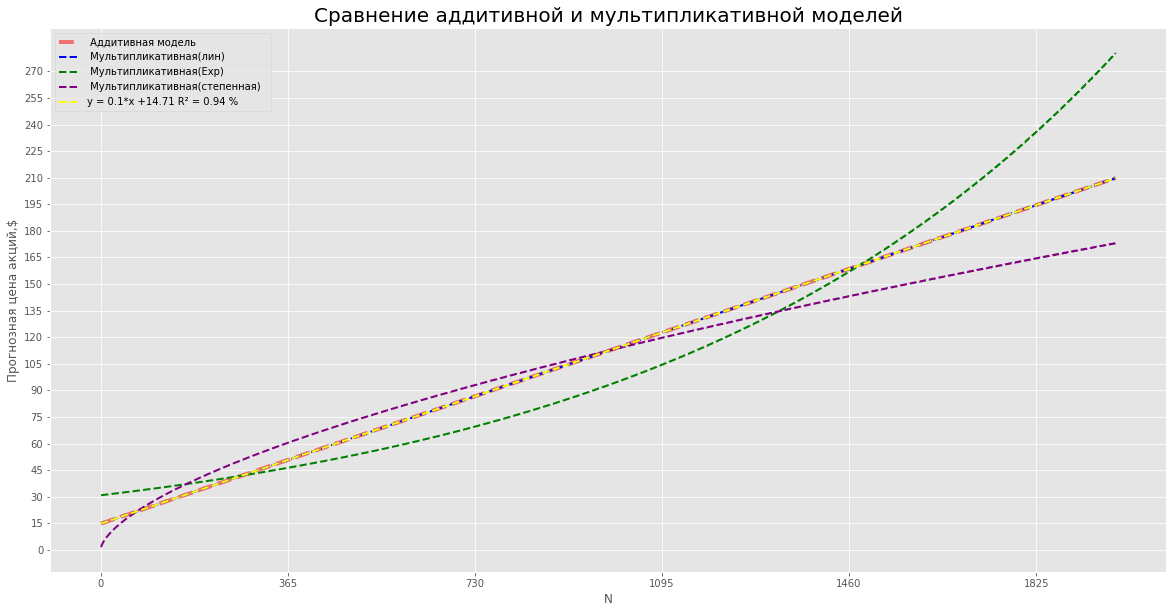

In [66]:
fig  ,ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Q,TS, linestyle='--', color='Red', marker='',alpha=0.5, linewidth='4',label=' Аддитивная модель', )

ax1.plot(Q,TS_Multi, linestyle='--', color='blue', marker='',linewidth='2',label=' Мультипликативная(лин)  ', )
ax1.plot(Q,exp_TS_Multi, linestyle='--', color='green', marker='',linewidth='2',label=' Мультипликативная(Exp)  ', )

ax1.plot(Q,step_TS_Multi, linestyle='--', color='purple', marker='',linewidth='2',label=' Мультипликативная(степенная)  ', )


x=Q
Y=y = coef_b*x + coef_a

ax1.plot(x,Y, linestyle='--', color='yellow',linewidth='2', alpha=1, label='y = 0.1*x +14.71 R² = 0.94 %')





ax1.set_title('Cравнение аддитивной и мультипликативной моделей',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Прогнозная цена акций,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(0,maxN,365))
ax1.set_yticks(np.arange(0,280,15))



fig.savefig('./graf1.png')

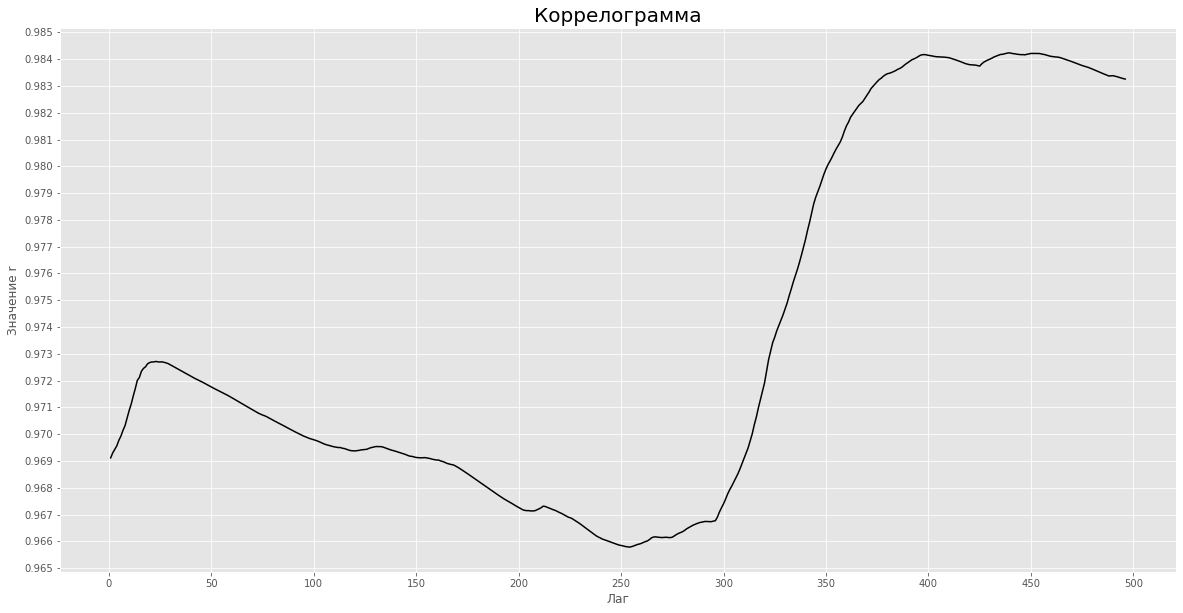

In [63]:
#Построим коррелограмму по исходрным данным
B=df.N[0:maxN]
A=df.Price[0:maxN]

Cor=[]
max=max=df.N.max()
max=int(max/4)
for i in range (0,max+1,1):
    x=np.corrcoef(B,A)[0][1]
    Cor.append(x)
    B.pop(i)
    A.pop(len(A)-1)
    
#print(Cor)

Num=df.N[0:max+1]

fig, ax=plt.subplots(figsize=(20,10))
ax.plot(Num,Cor,linestyle='-', color='black', marker='')
ax.set_title('Коррелограмма',fontsize=20)

ax.set_xlabel("Лаг")
ax.set_ylabel("Значение r")


ax.set_xticks(np.arange(0,501,50))
ax.set_yticks(np.arange(0.965,0.985,0.001))

fig.savefig('./CORR1.png')

In [ ]:
#тест Бройша-Годфри( пока в работе)!!!!!!!!
import statsmodels.api as sm

#define response variable
y = df.Price[0:maxN]

#define predictor variables
x = df.N[0:maxN]

#add constant to predictor variables
#x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

import statsmodels.stats.diagnostic as dg

#perform Breusch-Godfrey test at order p = 3
BG=[]
for i in range (1,1100,1):
    art=dg.acorr_breusch_godfrey(model, nlags=i)
    BG.append(art[1])
for i in range (0,1100,1):
    if(BG[i]>=0.05):
        print(i)


In [146]:
for i in range (0,1100,1):
    if(BG[i]>=0.05):
        
print(BG)


IndentationError: expected an indented block (<ipython-input-146-1501fed96607>, line 3)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [12]:
df = pd.read_csv("Facebook.csv", sep = ";")
df[0:4090]

,N,Date,Price
0,1,18.05.2012,38.2299995422363
1,2,21.05.2012,34.0299987792968
2,3,22.05.2012,31.00
3,4,23.05.2012,32.00
4,5,24.05.2012,33.0299987792968
...,...,...,...
1975,1976,26.03.2020,163.33999633789
1976,1977,27.03.2020,156.789993286132
1977,1978,30.03.2020,165.949996948242
1978,1979,31.03.2020,166.800003051757
